In [98]:
!pip install markovify

In [99]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# CountVectorizer+tfidfTransformer = tfidfVectorizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity

from bokeh.io import show,curdoc,output_notebook,push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource,HoverTool,Select,Paragraph,TextInput
from ipywidgets import interact

import markovify
import string
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

import warnings; warnings.simplefilter('ignore')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [100]:
!pip uninstall scikit-learn -y


Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Successfully uninstalled scikit-learn-1.3.2


In [101]:
!pip install scikit-learn==1.3.2


  Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.8 requires scikit-learn>=1.6, but you have scikit-learn 1.3.2 which is incompatible.


In [102]:
from sklearn.metrics import classification_report

In [103]:
df=pd.read_csv('skincareproducts.csv',index_col=[0])

In [104]:
df.head(10)

Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
Unnamed: 0                                                              
0              Medium  Combination     Brown   Brunette             5   
1              Medium  Combination     Brown        Red             1   
2                Dark       Normal      Gray       Gray             5   
3                Fair          Dry      Blue     Blonde             5   
4                Fair       Normal     Green     Blonde             5   
5                Dark       Normal      Gray       Gray             2   
6           Porcelain         Oily      Blue   Brunette             1   
7                 Tan          Dry     Brown      Black             5   
8                Fair  Combination     Hazel   Brunette             5   
9               Light  Combination      Blue     Blonde             5   

                                                       Review  \
Unnamed: 0                                                      
0           This is hands down the best cleanser I’ve ever...   
1           Unfortunately this doesn’t work for everyone. ...   
2           My favorite cleanser!! i love the packaging on...   
3           I love all things Youth To The People! This cl...   
4           I had a trial size of this and was obsessed. M...   
5           There is nothing great about this cleanser. I ...   
6           Been trying this cleanser for about 3 weeks no...   
7           loveeeeeee this cleanser. Leaves my skin smoot...   
8           Like the fact that you do not need to use a lo...   
9           I like it so far! Doesn’t feel stripping and s...   

                              product_name                Brand  Price  \
Unnamed: 0                                                               
0           Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36   
1           Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36   
2           Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36   
3           Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36   
4           Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36   
5           Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36   
6           Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36   
7           Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36   
8           Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36   
9           Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36   

                                                  Ingredients  Category  \
Unnamed: 0                                                                
0           Water, Sodium Cocoyl Glutamate, Cocamidopropyl...  Cleanser   
1           Water, Sodium Cocoyl Glutamate, Cocamidopropyl...  Cleanser   
2           Water, Sodium Cocoyl Glutamate, Cocamidopropyl...  Cleanser   
3           Water, Sodium Cocoyl Glutamate, Cocamidopropyl...  Cleanser   
4           Water, Sodium Cocoyl Glutamate, Cocamidopropyl...  Cleanser   
5           Water, Sodium Cocoyl Glutamate, Cocamidopropyl...  Cleanser   
6           Water, Sodium Cocoyl Glutamate, Cocamidopropyl...  Cleanser   
7           Water, Sodium Cocoyl Glutamate, Cocamidopropyl...  Cleanser   
8           Water, Sodium Cocoyl Glutamate, Cocamidopropyl...  Cleanser   
9           Water, Sodium Cocoyl Glutamate, Cocamidopropyl...  Cleanser   

                                                  Product_Url  \
Unnamed: 0                                                      
0           https://www.sephora.com/product/kale-spinach-g...   
1           https://www.sephora.com/product/kale-spinach-g...   
2           https://www.sephora.com/product/kale-spinach-g...   
3           https://www.sephora.com/product/kale-spinach-g...   
4           https://www.sephora.com/product/kale-spinach-g...   
5           https://www.sephora.com/product/kale-spinach-g...   
6           https://www.sephora.com/product/

In [105]:
df.tail()

Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
Unnamed: 0                                                             
8698            Fair  Combination     Hazel   Brunette             5   
8699           Light  Combination      Blue     Blonde             5   
8700            Dark  Combination     Brown      Black             5   
8701            Dark       Normal      Gray       Gray             5   
8702            Dark       Normal      Gray       Gray             5   

                                                       Review  \
Unnamed: 0                                                      
8698        I was looking for a overnight serum with retin...   
8699        I have never experienced such fast results in ...   
8700        Holy grail product for me! Everyone can tell w...   
8701        I love this product very much. Very much ! Exp...   
8702        I have tried a million creams and treatments f...   

                                                 product_name  \
Unnamed: 0                                                      
8698        Ferulic + Retinol Wrinkle Recovery Overnight S...   
8699        Ferulic + Retinol Wrinkle Recovery Overnight S...   
8700        Ferulic + Retinol Wrinkle Recovery Overnight S...   
8701        Ferulic + Retinol Wrinkle Recovery Overnight S...   
8702        Ferulic + Retinol Wrinkle Recovery Overnight S...   

                                Brand  Price  \
Unnamed: 0                                     
8698        DR. DENNIS GROSS SKINCARE     88   
8699        DR. DENNIS GROSS SKINCARE     88   
8700        DR. DENNIS GROSS SKINCARE     88   
8701        DR. DENNIS GROSS SKINCARE     88   
8702        DR. DENNIS GROSS SKINCARE     88   

                                                  Ingredients     Category  \
Unnamed: 0                                                                   
8698        Water, DiCaprylyl Carbonate, Niacinamide, Cety...  Moisturizer   
8699        Water, DiCaprylyl Carbonate, Niacinamide, Cety...  Moisturizer   
8700        Water, DiCaprylyl Carbonate, Niacinamide, Cety...  Moisturizer   
8701        Water, DiCaprylyl Carbonate, Niacinamide, Cety...  Moisturizer   
8702        Water, DiCaprylyl Carbonate, Niacinamide, Cety...  Moisturizer   

                                                  Product_Url  \
Unnamed: 0                                                      
8698        https://www.sephora.com/product/ferulic-retino...   
8699        https://www.sephora.com/product/ferulic-retino...   
8700        https://www.sephora.com/product/ferulic-retino...   
8701        https://www.sephora.com/product/ferulic-retino...   
8702        https://www.sephora.com/product/ferulic-retino...   

                                          Ingredients_Cleaned  Good_Stuff  
Unnamed: 0                                                                 
8698        ['dicaprylyl', 'carbonate', 'niacinamide', 'ce...           1  
8699        ['dicaprylyl', 'carbonate', 'niacinamide', 'ce...           1  
8700        ['dicaprylyl', 'carbonate', 'niacinamide', 'ce...           1  
8701        ['dicaprylyl', 'carbonate', 'niacinamide', 'ce...           1  
8702        ['dicaprylyl', 'carbonate', 'niacinamide', 'ce...           1

## EDA and Data Visualization

<Axes: xlabel='Skin_Tone'>

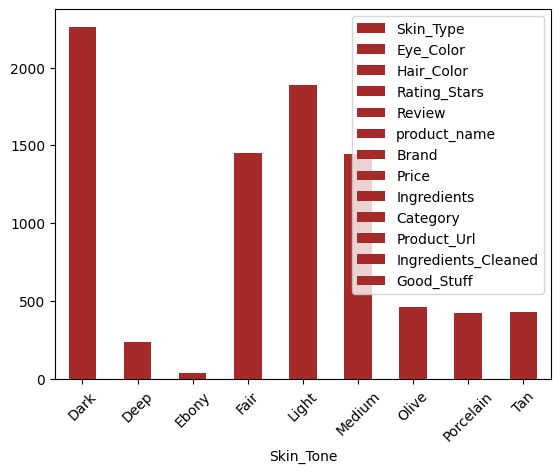

In [106]:
skintone_stats=df.groupby('Skin_Tone').count()
skintone_stats.plot.bar(color='brown',rot=45)

In [107]:
skintype_stats=df.groupby('Skin_Type').count()

<Axes: xlabel='Skin_Type'>

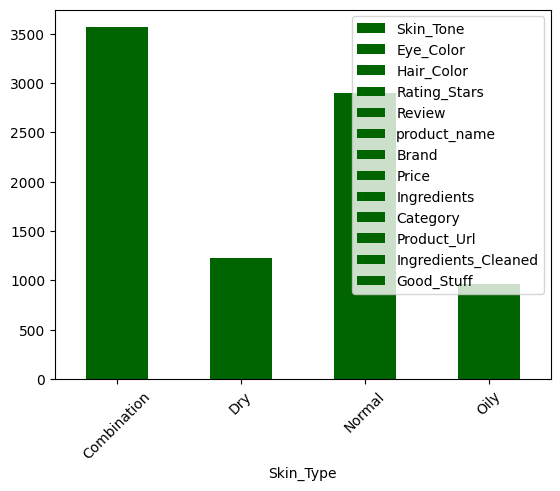

In [108]:
skintype_stats.plot.bar(color='darkgreen',rot=45)

In [109]:
eyecolor_stats=df.groupby('Eye_Color').count()

<Axes: xlabel='Eye_Color'>

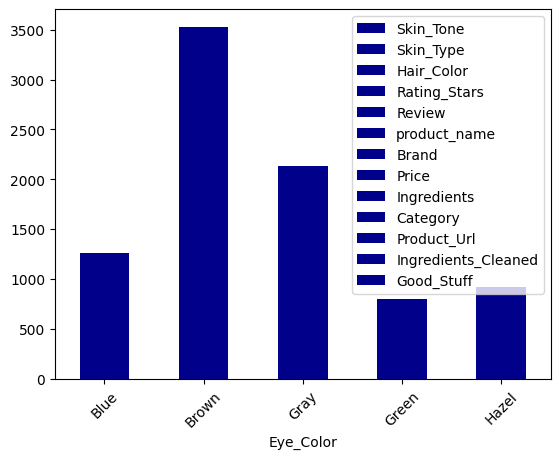

In [110]:
eyecolor_stats.plot.bar(color='darkblue',rot=45)

In [111]:
haircolor_stats=df.groupby('Hair_Color').count()

<Axes: xlabel='Hair_Color'>

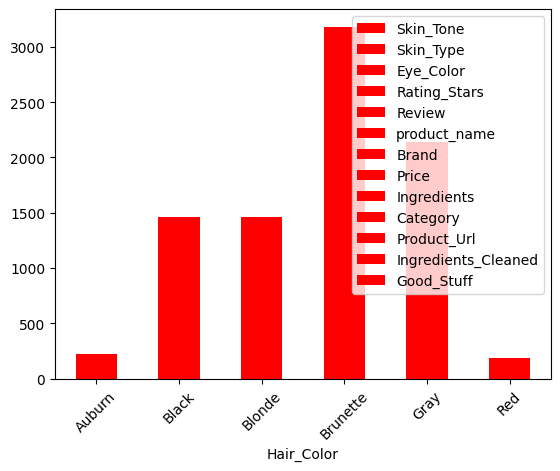

In [112]:
haircolor_stats.plot.bar(color='red',rot=45)

<Axes: xlabel='Rating_Stars'>

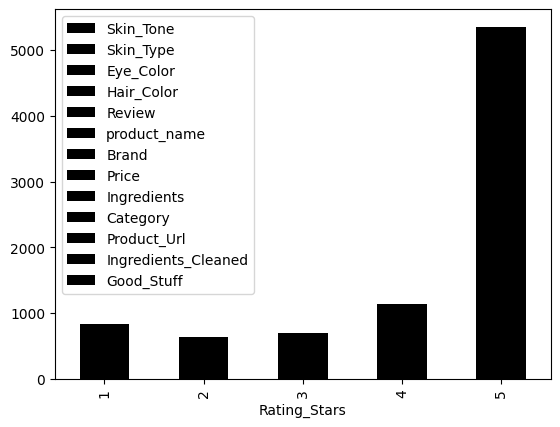

In [113]:
rating_stats = df.groupby('Rating_Stars').count()
rating_stats.plot.bar(color = 'black')

In [114]:
import markovify
import string

In [115]:
def no_punc(string):
    no_punc_string=re.sub('[^\w\s]','',string)
    return no_punc_string

In [116]:
df['Review']=df.apply(lambda row: no_punc(row['Review']),axis=1)

In [117]:
df['Review'].head()

Unnamed: 0
0    This is hands down the best cleanser Ive ever ...
1    Unfortunately this doesnt work for everyone I ...
2    My favorite cleanser i love the packaging on t...
3    I love all things Youth To The People This cle...
4    I had a trial size of this and was obsessed My...
Name: Review, dtype: object

In [118]:
text_model=markovify.NewlineText(df.Review,state_size=2)

In [119]:
for i in range(10):
    print(text_model.make_sentence(),'\n\n')

I originally started with a moisturizer after moisturizer How I apply it and sleep It is thick and goopy This went back online and bought my 4th bottle 


I think it helps you as the coveted Pixie version They both royally screwed with my acne Maybe even made it that far I was in Paris about a month and I love it Usage notes only to break out which was not stripping my skin so primers often clog my pores and brighter and my skin oil I am super sad that they worked on me 


These are the only cleansers Ive ever used I wear my heavy mineral sunscreen moisturizer sit on top of it I started to smell it and a mask when needed I think the more you use it unless and until this product does seem a bit unpleasant I also have something to help it be gone 


Im currently experiencing acne I use this sample product free for testing purposes in exchange for my oily skin Another great feature of this bottle 


I rarely had to throw away the shine off longer 


I dont wear anything remotely heavy or 

In [120]:
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

In [121]:
negativedf=df[df.Rating_Stars<=4]

In [122]:
negativedf.head()

Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
Unnamed: 0                                                              
1              Medium  Combination     Brown        Red             1   
5                Dark       Normal      Gray       Gray             2   
6           Porcelain         Oily      Blue   Brunette             1   
18               Dark  Combination     Brown     Blonde             4   
20              Olive         Oily     Brown      Black             3   

                                                       Review  \
Unnamed: 0                                                      
1           Unfortunately this doesnt work for everyone I ...   
5           There is nothing great about this cleanser I g...   
6           Been trying this cleanser for about 3 weeks no...   
18          Best cleaner Ive ever used Gets my face nice a...   
20          There are Pros and Cons to this cleanser This ...   

                              product_name                Brand  Price  \
Unnamed: 0                                                               
1           Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36   
5           Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36   
6           Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36   
18          Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36   
20          Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36   

                                                  Ingredients  Category  \
Unnamed: 0                                                                
1           Water, Sodium Cocoyl Glutamate, Cocamidopropyl...  Cleanser   
5           Water, Sodium Cocoyl Glutamate, Cocamidopropyl...  Cleanser   
6           Water, Sodium Cocoyl Glutamate, Cocamidopropyl...  Cleanser   
18          Water, Sodium Cocoyl Glutamate, Cocamidopropyl...  Cleanser   
20          Water, Sodium Cocoyl Glutamate, Cocamidopropyl...  Cleanser   

                                                  Product_Url  \
Unnamed: 0                                                      
1           https://www.sephora.com/product/kale-spinach-g...   
5           https://www.sephora.com/product/kale-spinach-g...   
6           https://www.sephora.com/product/kale-spinach-g...   
18          https://www.sephora.com/product/kale-spinach-g...   
20          https://www.sephora.com/product/kale-spinach-g...   

                                          Ingredients_Cleaned  Good_Stuff  
Unnamed: 0                                                                 
1           ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...           0  
5           ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...           0  
6           ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...           0  
18          ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...           0  
20          ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...           0

In [123]:
positvedf=df[df.Rating_Stars>4]

In [124]:
positvedf.head()

Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
Unnamed: 0                                                             
0             Medium  Combination     Brown   Brunette             5   
2               Dark       Normal      Gray       Gray             5   
3               Fair          Dry      Blue     Blonde             5   
4               Fair       Normal     Green     Blonde             5   
7                Tan          Dry     Brown      Black             5   

                                                       Review  \
Unnamed: 0                                                      
0           This is hands down the best cleanser Ive ever ...   
2           My favorite cleanser i love the packaging on t...   
3           I love all things Youth To The People This cle...   
4           I had a trial size of this and was obsessed My...   
7           loveeeeeee this cleanser Leaves my skin smooth...   

                              product_name                Brand  Price  \
Unnamed: 0                                                               
0           Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36   
2           Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36   
3           Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36   
4           Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36   
7           Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36   

                                                  Ingredients  Category  \
Unnamed: 0                                                                
0           Water, Sodium Cocoyl Glutamate, Cocamidopropyl...  Cleanser   
2           Water, Sodium Cocoyl Glutamate, Cocamidopropyl...  Cleanser   
3           Water, Sodium Cocoyl Glutamate, Cocamidopropyl...  Cleanser   
4           Water, Sodium Cocoyl Glutamate, Cocamidopropyl...  Cleanser   
7           Water, Sodium Cocoyl Glutamate, Cocamidopropyl...  Cleanser   

                                                  Product_Url  \
Unnamed: 0                                                      
0           https://www.sephora.com/product/kale-spinach-g...   
2           https://www.sephora.com/product/kale-spinach-g...   
3           https://www.sephora.com/product/kale-spinach-g...   
4           https://www.sephora.com/product/kale-spinach-g...   
7           https://www.sephora.com/product/kale-spinach-g...   

                                          Ingredients_Cleaned  Good_Stuff  
Unnamed: 0                                                                 
0           ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...           1  
2           ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...           1  
3           ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...           1  
4           ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...           1  
7           ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...           1

In [125]:
negative=" ".join(review for review in negativedf.Review)

In [126]:
negative

'Unfortunately this doesnt work for everyone I used it once and woke up the nxt day with 5 pimples used it again and again and again but woke up with more and more Finally i couldnt take it anymore I stopped using it went back to my cerave hydrating cleanser and Bam My skin was clearing up every day after that I suggest getting the small bottle to try it out first Remember everyones skin is very different\nread more There is nothing great about this cleanser I got the small size bottle to try out and would certainly never spend my money to buy this It did remove my makeup so this got 2 stars instead of one but it did nothing for my skin In fact I had some uneven texture after using this for a while There are much better cleansers out there Been trying this cleanser for about 3 weeks now and its not for me Im so glad I only bought the small bottle as this product broke me out Its the only new product in my routine so I know it is this one causing the break outs I also just didnt feel as

In [127]:
positive=" ".join(review for review in positvedf.Review)

In [128]:
positive

'This is hands down the best cleanser Ive ever used I originally got it in the mini bottle at checkout on a whim and was shocked by how much it cleared my skin up I bought the big bottle and havent looked back since now this is the only cleanser Ill use I used to get little pimples all over my forehead and ever since I started using this a year ago they went away and havent returned While I cant speak for everyones skin this was a miracle product for clearing my complexion and soothes my facial redness each time I use it Im in love\nread more My favorite cleanser i love the packaging on this even tho my first bottle slipped out of my hands lol I love all things Youth To The People This cleanser smells fresh and light the ingredients are fantastic and they are crueltyfree A quick google search of any brand will tell you if theyre actually crueltyfree dont just trust what a company says on its site there are very loose rules about a company being able to claim theyre CF on their marketin

In [129]:
stopwords=set(STOPWORDS)

In [130]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [131]:
stopwords.update(['read','more','product'])

In [132]:
len(set(STOPWORDS))

192

In [133]:
len(stopwords)

194

In [134]:
def generate_wordcloud(data):
    wordcloud=WordCloud(stopwords=stopwords,background_color='white').generate(data)
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

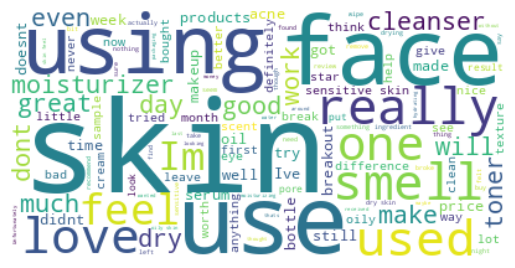

In [135]:
generate_wordcloud(negative)

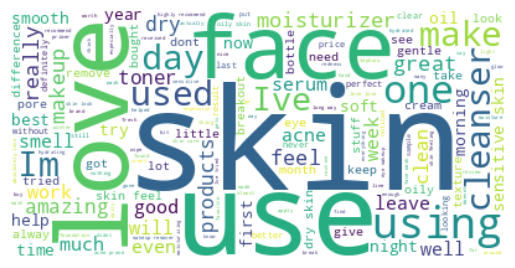

In [136]:
generate_wordcloud(positive)

In [137]:
df['Category'].value_counts()

Category
Cleanser       4117
Moisturizer    2560
Treatment      1948
Face Mask        24
Name: count, dtype: int64

In [138]:
moist_df=df[df.Category=='Moisturizer']

In [139]:
cleanse_df=df[df.Category=='Cleanser']

In [140]:
cleanse_df.head()

Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
Unnamed: 0                                                             
0             Medium  Combination     Brown   Brunette             5   
1             Medium  Combination     Brown        Red             1   
2               Dark       Normal      Gray       Gray             5   
3               Fair          Dry      Blue     Blonde             5   
4               Fair       Normal     Green     Blonde             5   

                                                       Review  \
Unnamed: 0                                                      
0           This is hands down the best cleanser Ive ever ...   
1           Unfortunately this doesnt work for everyone I ...   
2           My favorite cleanser i love the packaging on t...   
3           I love all things Youth To The People This cle...   
4           I had a trial size of this and was obsessed My...   

                              product_name                Brand  Price  \
Unnamed: 0                                                               
0           Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36   
1           Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36   
2           Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36   
3           Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36   
4           Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36   

                                                  Ingredients  Category  \
Unnamed: 0                                                                
0           Water, Sodium Cocoyl Glutamate, Cocamidopropyl...  Cleanser   
1           Water, Sodium Cocoyl Glutamate, Cocamidopropyl...  Cleanser   
2           Water, Sodium Cocoyl Glutamate, Cocamidopropyl...  Cleanser   
3           Water, Sodium Cocoyl Glutamate, Cocamidopropyl...  Cleanser   
4           Water, Sodium Cocoyl Glutamate, Cocamidopropyl...  Cleanser   

                                                  Product_Url  \
Unnamed: 0                                                      
0           https://www.sephora.com/product/kale-spinach-g...   
1           https://www.sephora.com/product/kale-spinach-g...   
2           https://www.sephora.com/product/kale-spinach-g...   
3           https://www.sephora.com/product/kale-spinach-g...   
4           https://www.sephora.com/product/kale-spinach-g...   

                                          Ingredients_Cleaned  Good_Stuff  
Unnamed: 0                                                                 
0           ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...           1  
1           ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...           0  
2           ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...           1  
3           ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...           1  
4           ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...           1

In [141]:
mask_df=df[df.Category=='Face Mask']

In [142]:
mask_df.head()

Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
Unnamed: 0                                                             
3072          Medium  Combination     Brown      Black             1   
3073            Fair  Combination     Hazel   Brunette             4   
3074           Olive         Oily     Brown      Black             4   
3075          Medium  Combination     Green     Blonde             5   
3076             Tan  Combination     Brown   Brunette             3   

                                                       Review  \
Unnamed: 0                                                      
3072        Its make my skin so dry I had to return it Its...   
3073        This cream doesnt feel heavy on the skin its r...   
3074        I have been using this product for a little bi...   
3075        I love this product I have combo skin and its ...   
3076        Feels nice on the skin and relaxing Love that ...   

                         product_name    Brand  Price  \
Unnamed: 0                                              
3072        Time Freeze Sleeping Mask  LANEIGE     39   
3073        Time Freeze Sleeping Mask  LANEIGE     39   
3074        Time Freeze Sleeping Mask  LANEIGE     39   
3075        Time Freeze Sleeping Mask  LANEIGE     39   
3076        Time Freeze Sleeping Mask  LANEIGE     39   

                                                  Ingredients   Category  \
Unnamed: 0                                                                 
3072        Water, Propanediol, Avena Sativa (Oat) Kernel ...  Face Mask   
3073        Water, Propanediol, Avena Sativa (Oat) Kernel ...  Face Mask   
3074        Water, Propanediol, Avena Sativa (Oat) Kernel ...  Face Mask   
3075        Water, Propanediol, Avena Sativa (Oat) Kernel ...  Face Mask   
3076        Water, Propanediol, Avena Sativa (Oat) Kernel ...  Face Mask   

                                                  Product_Url  \
Unnamed: 0                                                      
3072        https://www.sephora.com/product/time-freeze-sl...   
3073        https://www.sephora.com/product/time-freeze-sl...   
3074        https://www.sephora.com/product/time-freeze-sl...   
3075        https://www.sephora.com/product/time-freeze-sl...   
3076        https://www.sephora.com/product/time-freeze-sl...   

                                          Ingredients_Cleaned  Good_Stuff  
Unnamed: 0                                                                 
3072        ['propanediol', 'avena', 'sativa', 'oat', 'ker...           0  
3073        ['propanediol', 'avena', 'sativa', 'oat', 'ker...           0  
3074        ['propanediol', 'avena', 'sativa', 'oat', 'ker...           0  
3075        ['propanediol', 'avena', 'sativa', 'oat', 'ker...           1  
3076        ['propanediol', 'avena', 'sativa', 'oat', 'ker...           0

In [143]:
treat_df=df[df.Category=='Treatment']

In [144]:
treat_df.head()

Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
Unnamed: 0                                                             
6500            Fair  Combination     Hazel   Brunette             5   
6501           Light  Combination     Green     Blonde             4   
6502            Dark       Normal      Gray       Gray             2   
6503            Dark       Normal      Gray       Gray             4   
6504           Light       Normal     Hazel      Black             5   

                                                       Review  \
Unnamed: 0                                                      
6500        This product noticeably firmed and plumped my ...   
6501        I love this product so far I want to see how w...   
6502        Noticed zero change in my skin I was reluctant...   
6503        I actually saw plumper and more radiant skin a...   
6504        I received this as a sample and have been usin...   

                       product_name  Brand  Price  \
Unnamed: 0                                          
6500        Rapid Collagen Infusion  MURAD     84   
6501        Rapid Collagen Infusion  MURAD     84   
6502        Rapid Collagen Infusion  MURAD     84   
6503        Rapid Collagen Infusion  MURAD     84   
6504        Rapid Collagen Infusion  MURAD     84   

                                                  Ingredients   Category  \
Unnamed: 0                                                                 
6500        Water, Isodecyl Neopentanoate, Polymethylsilse...  Treatment   
6501        Water, Isodecyl Neopentanoate, Polymethylsilse...  Treatment   
6502        Water, Isodecyl Neopentanoate, Polymethylsilse...  Treatment   
6503        Water, Isodecyl Neopentanoate, Polymethylsilse...  Treatment   
6504        Water, Isodecyl Neopentanoate, Polymethylsilse...  Treatment   

                                                  Product_Url  \
Unnamed: 0                                                      
6500        https://www.sephora.com/product/rapid-collagen...   
6501        https://www.sephora.com/product/rapid-collagen...   
6502        https://www.sephora.com/product/rapid-collagen...   
6503        https://www.sephora.com/product/rapid-collagen...   
6504        https://www.sephora.com/product/rapid-collagen...   

                                          Ingredients_Cleaned  Good_Stuff  
Unnamed: 0                                                                 
6500        ['isodecyl', 'neopentanoate', 'polymethylsilse...           1  
6501        ['isodecyl', 'neopentanoate', 'polymethylsilse...           0  
6502        ['isodecyl', 'neopentanoate', 'polymethylsilse...           0  
6503        ['isodecyl', 'neopentanoate', 'polymethylsilse...           0  
6504        ['isodecyl', 'neopentanoate', 'polymethylsilse...           1

In [145]:
moist=" ".join(ing for ing in moist_df.Ingredients)

In [146]:
moist

"Water, Alcohol*, Citrus Aurantium Amara (Bitter Orange) Flower Water*, Parfum (Fragrance)*, Rosmarinus Officinalis (Rosemary) Leaf Oil*, Potassium Alum, Glycerin*, Mentha Piperita (Peppermint) Oil*, Styrax Tonkinensis Resin Extract*, Commiphora Myrrha Resin Extract*, Melissa Officinalis (Balm Mint) Leaf Oil*, Rosa Damascena Flower Oil*, Vitis Vinifera (Grape) Fruit Extract*, Tocopherol*, Citral*, Limonene*, Linalool*, Citronellol*, Geraniol*, Farnesol*, Benzyl Benzoate*, Eugenol*. *Plant origin. Water, Alcohol*, Citrus Aurantium Amara (Bitter Orange) Flower Water*, Parfum (Fragrance)*, Rosmarinus Officinalis (Rosemary) Leaf Oil*, Potassium Alum, Glycerin*, Mentha Piperita (Peppermint) Oil*, Styrax Tonkinensis Resin Extract*, Commiphora Myrrha Resin Extract*, Melissa Officinalis (Balm Mint) Leaf Oil*, Rosa Damascena Flower Oil*, Vitis Vinifera (Grape) Fruit Extract*, Tocopherol*, Citral*, Limonene*, Linalool*, Citronellol*, Geraniol*, Farnesol*, Benzyl Benzoate*, Eugenol*. *Plant origi

In [147]:
cleanse=" ".join(ing for ing in cleanse_df.Ingredients)

In [148]:
cleanse

"Water, Sodium Cocoyl Glutamate, Cocamidopropyl Betaine, Panthenol (Vitamin B5),Tocopheryl Acetate (Vitamin E), Ascorbic Acid (Vitamin C), Butylene Glycol, Brassica Oleracea(Kale) Leaf Extract, Spinacia Oleracea (Spinach) Leaf Extract, Camellia Sinensis (Green Tea)Leaf Extract, Chamomilla Recutita (Matricaria) Flower Extract, Medicago Sativa (Alfalfa) Extract,Aloe Barbadensis (Aloe Vera) Leaf Extract, Natural Fragrance, Lecithin, HydroxypropylMethylcellulose, Phenoxyethanol, Potassium Sorbate, Sodium Benzoate, Chlorophyll. Water, Sodium Cocoyl Glutamate, Cocamidopropyl Betaine, Panthenol (Vitamin B5),Tocopheryl Acetate (Vitamin E), Ascorbic Acid (Vitamin C), Butylene Glycol, Brassica Oleracea(Kale) Leaf Extract, Spinacia Oleracea (Spinach) Leaf Extract, Camellia Sinensis (Green Tea)Leaf Extract, Chamomilla Recutita (Matricaria) Flower Extract, Medicago Sativa (Alfalfa) Extract,Aloe Barbadensis (Aloe Vera) Leaf Extract, Natural Fragrance, Lecithin, HydroxypropylMethylcellulose, Phenoxye

In [149]:
mask=" ".join(ing for ing in mask_df.Ingredients)

In [150]:
mask

'Water, Propanediol, Avena Sativa (Oat) Kernel Extract, Glycerin, Cyclopentasiloxane, Dimethicone, Squalane, Cyclohexasiloxane, Ceratonia Siliqua (Carob) Fruit Extract, Hibiscus Abelmoschus Seed Extract, Tillandsia Usneoides Extract, Adenosine, Hydrogenated Lecithin, C12-16 Alcohols, Glyceryl Caprylate, Dextrin, Dimethicone / Vinyl Dimethicone Crosspolymer, Dipalmitoyl Hydroxyproline, Butylene Glycol, Cetearyl Glucoside, Cetearyl Alcohol, Ethylhexylglycerin, Xanthan Gum, Theobroma Cacao (Cocoa) Extract, Palmitic Acid, Polysorbate 20, PVP, PEG-240 / HDI Copolymer Bis-Decyltetradeceth-20 Ether, Hydroxyethyl Acrylate / Sodium Acryloyldimethyl Taurate Copolymer, Disodium EDTA, Phenoxyethanol, Fragrance. Water, Propanediol, Avena Sativa (Oat) Kernel Extract, Glycerin, Cyclopentasiloxane, Dimethicone, Squalane, Cyclohexasiloxane, Ceratonia Siliqua (Carob) Fruit Extract, Hibiscus Abelmoschus Seed Extract, Tillandsia Usneoides Extract, Adenosine, Hydrogenated Lecithin, C12-16 Alcohols, Glycery

In [151]:
treat=" ".join(ing for ing in treat_df.Ingredients)

In [152]:
treat

"Water, Isodecyl Neopentanoate, Polymethylsilsesquioxane, Glycerin, Pentylene Glycol, Neopentyl Glycol Diethylhexanoate, Cetyl Ethylhexanoate, Stearic Acid, Cetearyl Olivate, Dimethicone/Bis-Isobutyl PPG-20 Crosspolymer, Sorbitan Olivate, Butylene Glycol, Honey, Urea, Yeast Amino Acids, Trehalose, Inositol, Taurine, Betaine, Caprylic/Capric Triglyceride, Alaria Esculenta Extract, Palmitoyl Tripeptide-5, Codium Tomentosum Extract, Hydrogenated Olive Oil, Olive Fruit Oil, Olive Oil Unsaponifiables, Sodium Hyaluronate, Collagen Amino Acids, Watermelon Fruit Extract, Apple Fruit Extract, Lentil Fruit Extract, Tocopheryl Acetate, Sodium PCA, Sodium Lactate, Zinc Gluconate, Ascorbic Acid, Chitosan, Propyl Gallate, Polysorbate 20, Acrylates/C10-30 Alkyl Acrylate Crosspolymer, Aminomethyl Propanol, Trisodium Ethylenediamine Disuccinate, Disodium EDTA, Phenoxyethanol, Caprylyl Glycol, Chlorphenesin, Linalool, Anthemis Nobilis Flower Extract, Anthemis Nobilis Flower Oil, Lavender Oil. Water, Iso

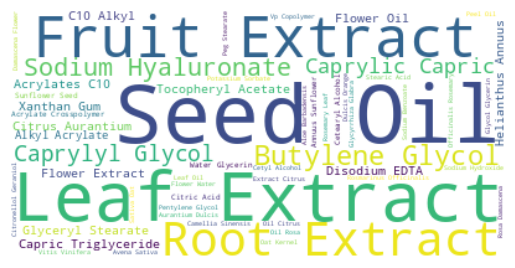

In [153]:
generate_wordcloud(moist)

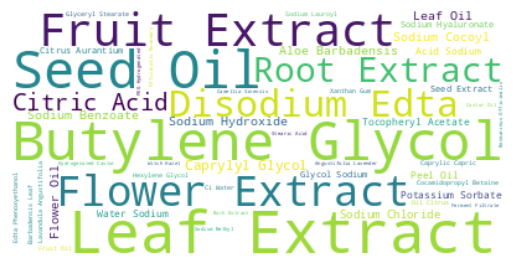

In [154]:
generate_wordcloud(cleanse)

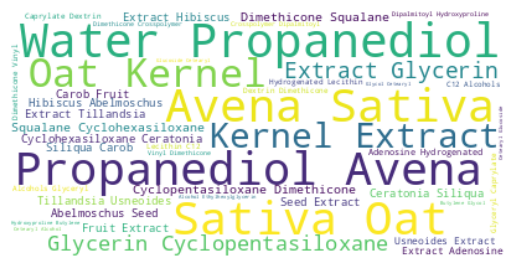

In [155]:
generate_wordcloud(mask)

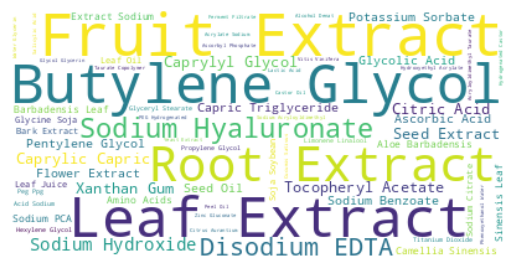

In [156]:
generate_wordcloud(treat)

In [157]:
x=df.Ingredients
y=df.Category

In [158]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)

In [159]:
categories=['Moisturizer','Cleanser','Face Mask','Treatment']

In [160]:
nb=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',MultinomialNB())])

In [161]:
nb.fit(xtrain,ytrain)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [162]:
y_pred=nb.predict(xtest)

In [163]:
print('accuracy %s' %accuracy_score(y_pred,ytest))

accuracy 0.9597780859916782


In [164]:
print(classification_report(ytest,y_pred,target_names=categories))

              precision    recall  f1-score   support

 Moisturizer       0.95      0.99      0.97      1031
    Cleanser       0.00      0.00      0.00         9
   Face Mask       0.98      0.96      0.97       649
   Treatment       0.94      0.90      0.92       474

    accuracy                           0.96      2163
   macro avg       0.72      0.71      0.72      2163
weighted avg       0.96      0.96      0.96      2163



In [165]:
logreg=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',LogisticRegression(n_jobs=1,C=1e5))])

In [166]:
logreg.fit(xtrain,ytrain)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0, n_jobs=1))])

In [167]:
y_pred=logreg.predict(xtest)

In [168]:
print('accuracy %s' %accuracy_score(y_pred,ytest))

accuracy 0.9833564493758669


In [169]:
print(classification_report(ytest,y_pred,target_names=categories))

              precision    recall  f1-score   support

 Moisturizer       0.99      0.97      0.98      1031
    Cleanser       1.00      1.00      1.00         9
   Face Mask       0.97      1.00      0.98       649
   Treatment       0.98      0.99      0.98       474

    accuracy                           0.98      2163
   macro avg       0.99      0.99      0.99      2163
weighted avg       0.98      0.98      0.98      2163



In [170]:
sgd=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',SGDClassifier(loss='hinge',penalty='l2',alpha=1e-3,random_state=42,max_iter=5))])

In [171]:
sgd.fit(xtrain,ytrain)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42))])

In [172]:
y_pred=sgd.predict(xtest)

In [173]:
print('accuracy %s' %accuracy_score(y_pred,ytest))

accuracy 0.9754969949144706


In [174]:
print(classification_report(ytest,y_pred,target_names=categories))

              precision    recall  f1-score   support

 Moisturizer       0.99      0.97      0.98      1031
    Cleanser       1.00      1.00      1.00         9
   Face Mask       0.96      1.00      0.98       649
   Treatment       0.97      0.96      0.96       474

    accuracy                           0.98      2163
   macro avg       0.98      0.98      0.98      2163
weighted avg       0.98      0.98      0.98      2163



In [175]:
def recommend_products_by_user_features(skintone, eyecolor, skintype, haircolor):
    # Filter dataset by user features
    ddf = df[
        (df['Skin_Tone'] == skintone) &
        (df['Eye_Color'] == eyecolor) &
        (df['Skin_Type'] == skintype) &
        (df['Hair_Color'] == haircolor)
    ]

    # Keep only needed columns and drop rows with null ratings
    ddf = ddf[['Rating_Stars', 'Product_Url', 'product_name']].dropna(subset=['Rating_Stars'])

    # Drop duplicate product names FIRST, then sort
    ddf = ddf.drop_duplicates(subset='product_name')

    # Sort by Rating and select top 3
    recommendations = ddf.sort_values('Rating_Stars', ascending=False).head(5)

    print('Based on your features, these are the top 5 unique products for you:')
    return recommendations


In [176]:
# Get inputs from user
skintone = input("Enter your Skin Tone: ")
eyecolor = input("Enter your Eye Color: ")
skintype = input("Enter your Skin Type: ")
haircolor = input("Enter your Hair Color: ")

# Call the function
top_products = recommend_products_by_user_features(skintone, eyecolor, skintype, haircolor)

# Show output
print(top_products)


Enter your Skin Tone: Dark
Enter your Eye Color: Brown
Enter your Skin Type: Normal
Enter your Hair Color: Black
Based on your features, these are the top 5 unique products for you:
            Rating_Stars                                        Product_Url  \
Unnamed: 0                                                                    
400                    5  https://www.sephora.com/product/balancing-forc...   
5529                   5  https://www.sephora.com/product/mattifying-blo...   
7414                   5  https://www.sephora.com/product/rapid-age-spot...   
2637                   4  https://www.sephora.com/product/argan-cleansin...   
7212                   1  https://www.sephora.com/product/advanced-genif...   

                                           product_name  
Unnamed: 0                                               
400                  Balancing Force™ Oil Control Toner  
5529                          Mattifying Blotting Films  
7414        Rapid Age Spot and P

In [177]:
from sklearn.metrics.pairwise import linear_kernel,cosine_similarity

In [178]:
df_cont=df[['product_name','Ingredients','Product_Url','Rating_Stars']]

In [179]:
df_cont.head()

product_name  \
Unnamed: 0                                   
0           Superfood Antioxidant Cleanser   
1           Superfood Antioxidant Cleanser   
2           Superfood Antioxidant Cleanser   
3           Superfood Antioxidant Cleanser   
4           Superfood Antioxidant Cleanser   

                                                  Ingredients  \
Unnamed: 0                                                      
0           Water, Sodium Cocoyl Glutamate, Cocamidopropyl...   
1           Water, Sodium Cocoyl Glutamate, Cocamidopropyl...   
2           Water, Sodium Cocoyl Glutamate, Cocamidopropyl...   
3           Water, Sodium Cocoyl Glutamate, Cocamidopropyl...   
4           Water, Sodium Cocoyl Glutamate, Cocamidopropyl...   

                                                  Product_Url  Rating_Stars  
Unnamed: 0                                                                   
0           https://www.sephora.com/product/kale-spinach-g...             5  
1           https://www.sephora.com/product/kale-spinach-g...             1  
2           https://www.sephora.com/product/kale-spinach-g...             5  
3           https://www.sephora.com/product/kale-spinach-g...             5  
4           https://www.sephora.com/product/kale-spinach-g...             5

In [180]:
df_cont.drop_duplicates(inplace=True)

In [181]:
tf=TfidfVectorizer(analyzer='word',ngram_range=(1,2),min_df=0,stop_words='english')

In [182]:
tf = TfidfVectorizer(min_df=1)  # Keeps words appearing in at least 1 document
tfidf_matrix = tf.fit_transform(df_cont['Ingredients'])

In [183]:
cosine_sim=linear_kernel(tfidf_matrix,tfidf_matrix)

In [184]:
df_cont.head()

product_name  \
Unnamed: 0                                   
0           Superfood Antioxidant Cleanser   
1           Superfood Antioxidant Cleanser   
5           Superfood Antioxidant Cleanser   
18          Superfood Antioxidant Cleanser   
20          Superfood Antioxidant Cleanser   

                                                  Ingredients  \
Unnamed: 0                                                      
0           Water, Sodium Cocoyl Glutamate, Cocamidopropyl...   
1           Water, Sodium Cocoyl Glutamate, Cocamidopropyl...   
5           Water, Sodium Cocoyl Glutamate, Cocamidopropyl...   
18          Water, Sodium Cocoyl Glutamate, Cocamidopropyl...   
20          Water, Sodium Cocoyl Glutamate, Cocamidopropyl...   

                                                  Product_Url  Rating_Stars  
Unnamed: 0                                                                   
0           https://www.sephora.com/product/kale-spinach-g...             5  
1           https://www.sephora.com/product/kale-spinach-g...             1  
5           https://www.sephora.com/product/kale-spinach-g...             2  
18          https://www.sephora.com/product/kale-spinach-g...             4  
20          https://www.sephora.com/product/kale-spinach-g...             3

In [185]:
df_cont.reset_index(drop=True)

product_name  \
0                        Superfood Antioxidant Cleanser   
1                        Superfood Antioxidant Cleanser   
2                        Superfood Antioxidant Cleanser   
3                        Superfood Antioxidant Cleanser   
4                        Superfood Antioxidant Cleanser   
...                                                 ...   
1399                 The Microdelivery Resurfacing Peel   
1400  Ferulic + Retinol Wrinkle Recovery Overnight S...   
1401  Ferulic + Retinol Wrinkle Recovery Overnight S...   
1402  Ferulic + Retinol Wrinkle Recovery Overnight S...   
1403  Ferulic + Retinol Wrinkle Recovery Overnight S...   

                                            Ingredients  \
0     Water, Sodium Cocoyl Glutamate, Cocamidopropyl...   
1     Water, Sodium Cocoyl Glutamate, Cocamidopropyl...   
2     Water, Sodium Cocoyl Glutamate, Cocamidopropyl...   
3     Water, Sodium Cocoyl Glutamate, Cocamidopropyl...   
4     Water, Sodium Cocoyl Glutamate, Cocamidopropyl...   
...                                                 ...   
1399  The Microdelivery Peel Step I:\r\r\nPeg-6, Sod...   
1400  Water, DiCaprylyl Carbonate, Niacinamide, Cety...   
1401  Water, DiCaprylyl Carbonate, Niacinamide, Cety...   
1402  Water, DiCaprylyl Carbonate, Niacinamide, Cety...   
1403  Water, DiCaprylyl Carbonate, Niacinamide, Cety...   

                                            Product_Url  Rating_Stars  
0     https://www.sephora.com/product/kale-spinach-g...             5  
1     https://www.sephora.com/product/kale-spinach-g...             1  
2     https://www.sephora.com/product/kale-spinach-g...             2  
3     https://www.sephora.com/product/kale-spinach-g...             4  
4     https://www.sephora.com/product/kale-spinach-g...             3  
...                                                 ...           ...  
1399  https://www.sephora.com/product/the-microdeliv...             2  
1400  https://www.sephora.com/product/ferulic-retino...             5  
1401  https://www.sephora.com/product/ferulic-retino...             2  
1402  https://www.sephora.com/product/ferulic-retino...             4  
1403  https://www.sephora.com/product/ferulic-retino...             1  

[1404 rows x 4 columns]

In [186]:
titles=df_cont[['product_name','Rating_Stars']]

In [187]:
titles.head()

product_name  Rating_Stars
Unnamed: 0                                              
0           Superfood Antioxidant Cleanser             5
1           Superfood Antioxidant Cleanser             1
5           Superfood Antioxidant Cleanser             2
18          Superfood Antioxidant Cleanser             4
20          Superfood Antioxidant Cleanser             3

In [188]:
indices=pd.Series(df_cont.index,index=df_cont['product_name'])

In [189]:
indices

product_name
Superfood Antioxidant Cleanser                           0
Superfood Antioxidant Cleanser                           1
Superfood Antioxidant Cleanser                           5
Superfood Antioxidant Cleanser                          18
Superfood Antioxidant Cleanser                          20
                                                      ... 
The Microdelivery Resurfacing Peel                    8671
Ferulic + Retinol Wrinkle Recovery Overnight Serum    8679
Ferulic + Retinol Wrinkle Recovery Overnight Serum    8680
Ferulic + Retinol Wrinkle Recovery Overnight Serum    8684
Ferulic + Retinol Wrinkle Recovery Overnight Serum    8687
Name: Unnamed: 0, Length: 1404, dtype: int64

In [190]:
indices['Superfood Antioxidant Cleanser']

product_name
Superfood Antioxidant Cleanser     0
Superfood Antioxidant Cleanser     1
Superfood Antioxidant Cleanser     5
Superfood Antioxidant Cleanser    18
Superfood Antioxidant Cleanser    20
Name: Unnamed: 0, dtype: int64

In [197]:
import pickle

# Save your models
with open("logistic_model.pkl", "wb") as f1:
    pickle.dump(logreg, f1)

with open("nb_model.pkl", "wb") as f2:
    pickle.dump(nb, f2)

with open("sgd_model.pkl", "wb") as f3:
    pickle.dump(sgd, f3)
